In [154]:
import pandas as pd
import os
import json
from pathlib import Path
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [155]:
def read_file(fpath):
    with open(fpath) as reader:
        return json.load(reader)["query_level"]

def read_results(path, flat=True):
    results = {}
    cqa = {}
    for fname in os.listdir(path):
        if not fname.endswith(".json"):
            continue

        if fname.startswith("dl") or fname.startswith("dev") and "scifact" not in fname:
            results[fname.split("_")[0].rstrip(".json")] = read_file(path/fname)
        elif "scifact" in fname:
            results["scifact"] = read_file(path/fname)
        elif fname.startswith("bier_test") and "cqa" not in fname:
            results[fname.split("_")[2].rstrip(".json")] = read_file(path/fname)
        elif "cqa" in fname:
            cqa_split = fname.split("_")[2].rstrip(".json")
            queries = read_file(path/fname)
            cqa.update({cqa_split + "_" + qid: mets for qid, mets in queries.items()})
        else:
            print(fname)
    results["cqa"] = cqa
    mean_results_raw = defaultdict(lambda: defaultdict(list))
    mean_results = {}
    for dname, queries in results.items():
        for qid, perfs in queries.items():
            for met, val in perfs.items():
                mean_results_raw[dname][met].append(val)


        if not flat:
            mean_results[dname] = {}

        
        for met, vals in mean_results_raw[dname].items():
            if met not in METRIC_SETS[dname]:
                continue
            assert len(vals) == QUERY_COUNTS[dname], str(path) + dname
            if flat:
                mean_results[f"{dname}_{met}"] = round(np.mean(vals), 3)
            else:
                mean_results[dname][met] = round(np.mean(vals), 3)
    
    return mean_results, mean_results_raw


METRIC_SETS = {
    "dev": {"recip_rank_cut_10", "map"},
    "dl19": {"ndcg_cut_10", "map"},
    "dl20": {"ndcg_cut_10", "map"},
    "scifact": {"ndcg_cut_10"},
    "cqa": {"ndcg_cut_10"},
    "trec-covid": {"ndcg_cut_10"},
    "fiqa": {"ndcg_cut_10"},
}

QUERY_COUNTS = {
    "dev": 6980,
    "dl19": 43,
    "dl20": 54,
    "scifact": 300,
    "trec-covid": 50,
    "cqa": 13145,
    "fiqa": 648,
}


MODELS = {
    "DPR":  Path("./gathered_results/dpr_hs_db_3_runs/"),
    "TAS-B (0s)":  Path("./gathered_results/tas_b_zeroshot_runs/"), 
    "MVRL (DB, ND)": Path("./gathered_results/mvrl_nd_db_14_updated_runs/"),
    "MVRL (DB, ND, LV)": Path("./gathered_results/mvrl_nd_db_logvar_3_updated_runs/"),
    "MVRL (ND)": Path("./gathered_results/mvrl_nd_tasb_2_updated_runs/"),
    "MVRL (ND)-255": Path("./gathered_results/mvrl_nd_tasb_dim255_updated_runs/"),
    
    "MVRL (ND, LV)": Path("./gathered_results/mvrl_nd_tasb_logvar_updated_runs/"),
    "MVRL-ND-TASB-Logvar-2GPU": Path("./gathered_results/mvrl_nd_tasb_logvar_2gpu_updated_runs/"),

    "MVRL-(ND, LV BZ-128)": Path("./gathered_results/mvrl_nd_tasb_logvar_128_updated_runs/"),
    "MVRL-(ND, LV BZ-256)": Path("./gathered_results/mvrl_nd_tasb_logvar_256_updated_runs/"),
    "MVRL-(ND, LV BZ-512)": Path("./gathered_results/mvrl_nd_tasb_logvar_512_updated_runs/"),
    "MVRL (LV)": Path("./gathered_results/mvrl_tasb_MiniLM_pseudolabels_CL_3_logvar_lr_3106_updated_runs/"),
    "MVRL": Path("./gathered_results/mvrl_updated_runs"),
    "CLDRD": Path("./gathered_results/cldrd_runs/"), 
    
    
    "MVRL (DB, ND, LV) (Mean)": Path("./gathered_results/mvrl_nd_db_logvar_3_mean_runs/"),
    "MVRL (ND) (Mean)": Path("./gathered_results/mvrl_nd_tasb_2_mean_runs/"),
    "MVRL (ND)-255 (Mean)": Path("./gathered_results/mvrl_nd_tasb_dim255_mean_runs/"),
    "MVRL (DB, ND) (Mean)": Path("./gathered_results/mvrl_nd_db_14_mean_runs/"),
    "MVRL (ND, LV) (Mean)": Path("./gathered_results/mvrl_nd_tasb_logvar_mean_runs/"),
    "MVRL-(ND, LV BZ-128) (Mean)": Path("./gathered_results/mvrl_nd_tasb_logvar_128_mean_runs/"),
    "MVRL-(ND, LV BZ-256) (Mean)": Path("./gathered_results/mvrl_nd_tasb_logvar_256_mean_runs/"),
    "MVRL-(ND, LV BZ-512) (Mean)": Path("./gathered_results/mvrl_nd_tasb_logvar_512_mean_runs/"),
    "MVRL (Mean)": Path("./gathered_results/mvrl_mean_runs/"),
    
    "MVRL (DB, ND) (Original)": Path("./gathered_results/mvrl_nd_db_14_original_runs/"),
    "MVRL-(DB, ND, LV) (Original)": Path("./gathered_results/mvrl_nd_db_logvar_3_original_runs/"),
    "MVRL (ND) (Original)": Path("./gathered_results/mvrl_nd_tasb_2_original_runs/"),
    "MVRL (ND)-255 (Original)": Path("./gathered_results/mvrl_nd_tasb_dim255_original_runs/"),
    "MVRL (ND, LV) (Original)": Path("./gathered_results/mvrl_nd_tasb_logvar_original_runs/"),
    "MVRL-(ND, LV BZ-128) (Original)": Path("./gathered_results/mvrl_nd_tasb_logvar_128_original_runs/"),
    "MVRL-(ND, LV BZ-256) (Original)": Path("./gathered_results/mvrl_nd_tasb_logvar_256_original_runs/"),
    "MVRL-(ND, LV BZ-512) (Original)": Path("./gathered_results/mvrl_nd_tasb_logvar_512_original_runs/"),
    "MVRL (Original)": Path("./gathered_results/mvrl_original_runs/"),

    "MVRL (BM25+ANN, IB, Labels)": Path("./gathered_results/mvrl_tasb_BM25_ANN_in_batch_labels_updated_runs/"),
    "MVRL (BM25+ANN, IB, Raw)": Path("./gathered_results/mvrl_tasb_BM25_ANN_in_batch_raw_updated_runs/"),
    "MVRL (BM25+ANN, IB, Raw, Normalized)": Path("./gathered_results/mvrl_tasb_BM25_ANN_in_batch_raw_normalized_updated_runs/"),
    

    
    "MVRL-ND-EDT": Path("./gathered_results/mvrl_nd_db_edt_updated_updated_runs/"),
    "MVRL-ND-EDT (Original)": Path("./gathered_results/mvrl_nd_db_edt_original_original_runs/"),

    "MCDropout-DB": Path("./gathered_results/stoch_db_runs/"),
    "MCDropout-DB-Frozen": Path("./gathered_results/stoch_db_frozen_runs/"),
    "MCDropout-TASB": Path("./gathered_results/stoch_tasb_runs/"),
    "MCDropout-TASB-Frozen": Path("./gathered_results/stoch_tasb_frozen_runs/"),


    "MCDropout-DB-MRL": Path("./gathered_results/stoch_db_mrl_runs/"),
    "MCDropout-DB-Frozen-MRL": Path("./gathered_results/stoch_db_frozen_mrl_runs/"),
    "MCDropout-TASB-MRL": Path("./gathered_results/stoch_tasb_mrl_runs/"),
    "MCDropout-TASB-Frozen-MRL": Path("./gathered_results/stoch_tasb_frozen_mrl_runs/"),
}


MEAN_RESULTS = {}
MEAN_RESULTS_RAW = {}
for model_name, res_path in MODELS.items():
    m, r = read_results(res_path)
    m["model"] = model_name
    MEAN_RESULTS[model_name] = m
    MEAN_RESULTS_RAW[model_name] = r

In [157]:
COL_ORDER = ['model',
 'dev_recip_rank_cut_10',
 'dev_map',
 'dl19_ndcg_cut_10',
 'dl19_map',
 'dl20_ndcg_cut_10',
 'dl20_map',
 'scifact_ndcg_cut_10',
 'fiqa_ndcg_cut_10',
 'trec-covid_ndcg_cut_10', 
 'cqa_ndcg_cut_10',
 ]


In [158]:
all_res_df = pd.DataFrame(MEAN_RESULTS.values())[COL_ORDER]
all_res_df

,model,dev_recip_rank_cut_10,dev_map,dl19_ndcg_cut_10,dl19_map,dl20_ndcg_cut_10,dl20_map,scifact_ndcg_cut_10,fiqa_ndcg_cut_10,trec-covid_ndcg_cut_10,cqa_ndcg_cut_10
0,DPR,0.312,0.319,0.649,0.345,0.625,0.356,0.474,0.231,0.600,0.266
1,TAS-B (0s),0.344,0.351,0.721,0.396,0.685,0.430,0.643,0.301,0.481,0.313
2,"MVRL (DB, ND)",0.315,0.322,0.636,0.348,0.631,0.366,0.494,0.244,0.574,0.280
3,"MVRL (DB, ND, LV)",0.316,0.322,0.636,0.349,0.625,0.363,0.497,0.236,0.552,0.279
4,MVRL (ND),0.328,0.334,0.629,0.390,0.644,0.410,0.498,0.245,0.473,0.268
5,MVRL (ND)-255,0.325,0.331,0.627,0.377,0.641,0.400,0.493,0.240,0.476,0.261
6,"MVRL (ND, LV)",0.330,0.337,0.641,0.388,0.647,0.406,0.523,0.241,0.342,0.265
7,MVRL-ND-TASB-Logvar-2GPU,0.333,0.340,0.652,0.400,0.659,0.419,0.519,0.250,0.376,0.272
8,"MVRL-(ND, LV BZ-128)",0.340,0.346,0.664,0.422,0.661,0.437,0.534,0.264,0.450,0.284
9,"MVRL-(ND, LV BZ-256)",0.341,0.348,0.683,0.431,0.669,0.443,0.548,0.267,0.442,0.290


In [159]:
all_res_df.to_clipboard(index=False)

## QPP 

In [160]:
from scipy.stats import kendalltau, pearsonr, spearmanr
import ir_datasets

In [161]:
def compute_self_perf(run_path, predicted_path, flip_sign=False):
    actual_performances = {}
    with open(run_path) as reader:
        run_res = json.load(reader)
        for qid, res_dict in run_res["query_level"].items():
            actual_performances[qid] = res_dict[RUN_METRIC]
    pred = [] 
    actual = []
    with open(predicted_path) as reader:
        for line in reader:
            qid, p = line.split()
            p = float(p)
            if flip_sign:
                pred.append(-1*p)
            else:
                pred.append(p)
            actual.append(actual_performances[qid])
    

    spearman_res = spearmanr(actual, pred)
    pearson_res = pearsonr(actual, pred)
    ktau_res = kendalltau(actual, pred)

    return {
        "spearman": spearman_res.statistic,
        "spearman_pval": spearman_res.pvalue,
        "pearson": pearson_res.statistic,
        "pearson_pval": pearson_res.pvalue,
        "ktau": ktau_res.statistic,
        "ktau_pval": ktau_res.pvalue
    }


def compute_ref_perf(actual_perf_path, predicted_path, flip_sign=False):
    
    with open(actual_perf_path) as reader:
        act = json.load(reader)

    pred = [] 
    actual = []
    with open(predicted_path) as reader:
        for line in reader:
            qid, p = line.split()
            p = float(p)
            if flip_sign:
                pred.append(-1*p)
            else:
                pred.append(p)
            actual.append(act[qid][QPP_METRIC])

    spearman_res = spearmanr(actual, pred)
    pearson_res = pearsonr(actual, pred)
    ktau_res = kendalltau(actual, pred)

    return {
        "spearman": spearman_res.statistic,
        "spearman_pval": spearman_res.pvalue,
        "pearson": pearson_res.statistic,
        "pearson_pval": pearson_res.pvalue,
        "ktau": ktau_res.statistic,
        "ktau_pval": ktau_res.pvalue
    }


print(compute_ref_perf("../datasets/actual_performances/dl19_dpr.json",
                "./gathered_results/mvrl_qpp/msmarco-dl19.txt", True) )

print(compute_ref_perf("../datasets/actual_performances/dl19_dpr.json",
                "./gathered_results/mvrl_qpp/msmarco-dl19.txt", False))

print(compute_self_perf("./gathered_results/mvrl_updated_runs/dl19.json", 
                  "./gathered_results/mvrl_qpp/msmarco-dl19.txt", False))

{'spearman': 0.22232291448258945, 'spearman_pval': 0.1518824991186859, 'pearson': 0.1904242610785997, 'pearson_pval': 0.22128080584929294, 'ktau': 0.15751547040140082, 'ktau_pval': 0.13717646834858693}
{'spearman': -0.22232291448258945, 'spearman_pval': 0.1518824991186859, 'pearson': -0.1904242610785997, 'pearson_pval': 0.22128080584929294, 'ktau': -0.15751547040140082, 'ktau_pval': 0.13717646834858693}
{'spearman': -0.10526315819484212, 'spearman_pval': 0.5017193397589581, 'pearson': -0.17048174300843533, 'pearson_pval': 0.27439066603494205, 'ktau': -0.06762753601724968, 'ktau_pval': 0.5231739053053375}


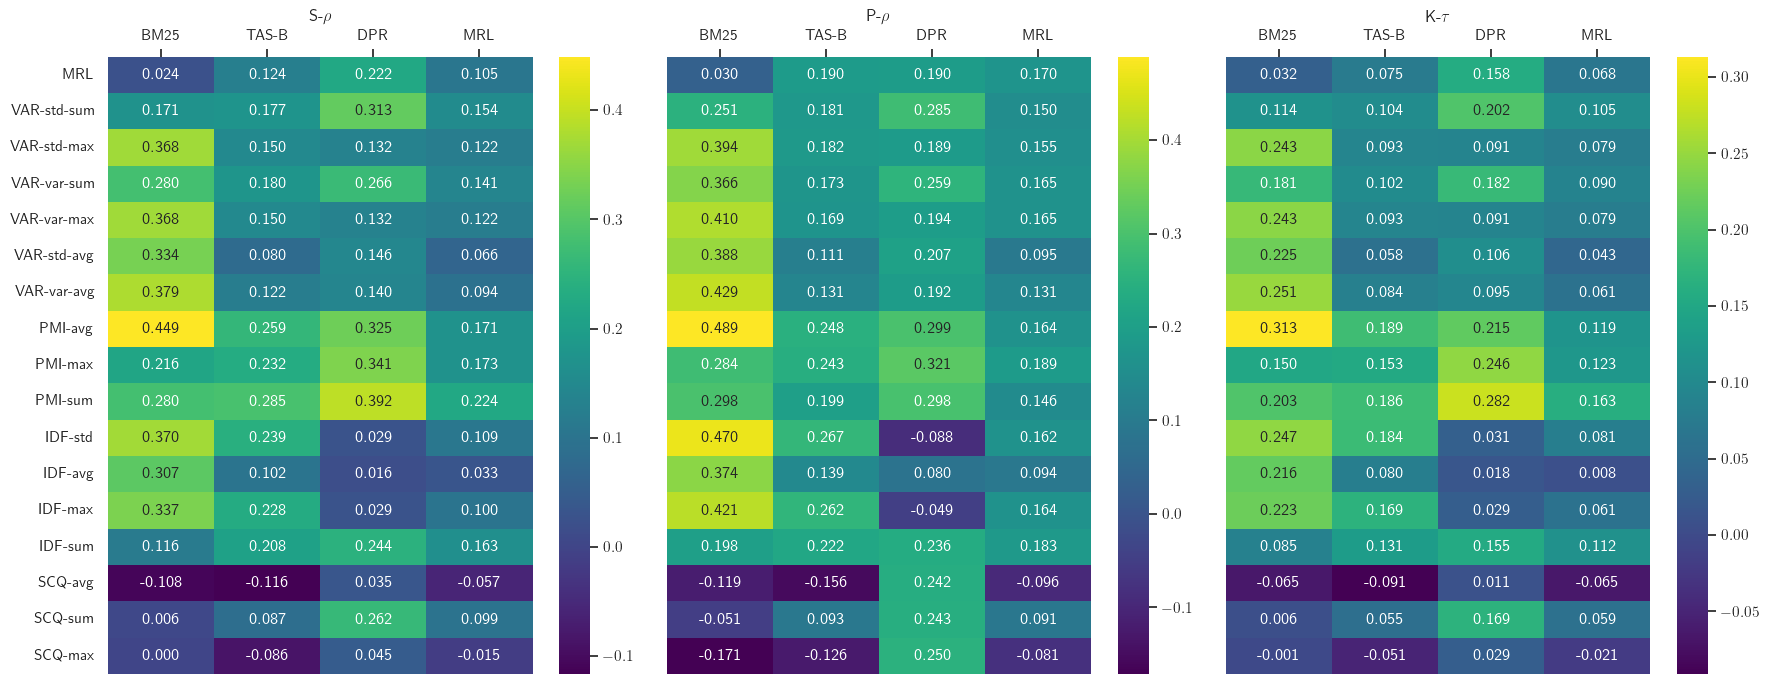

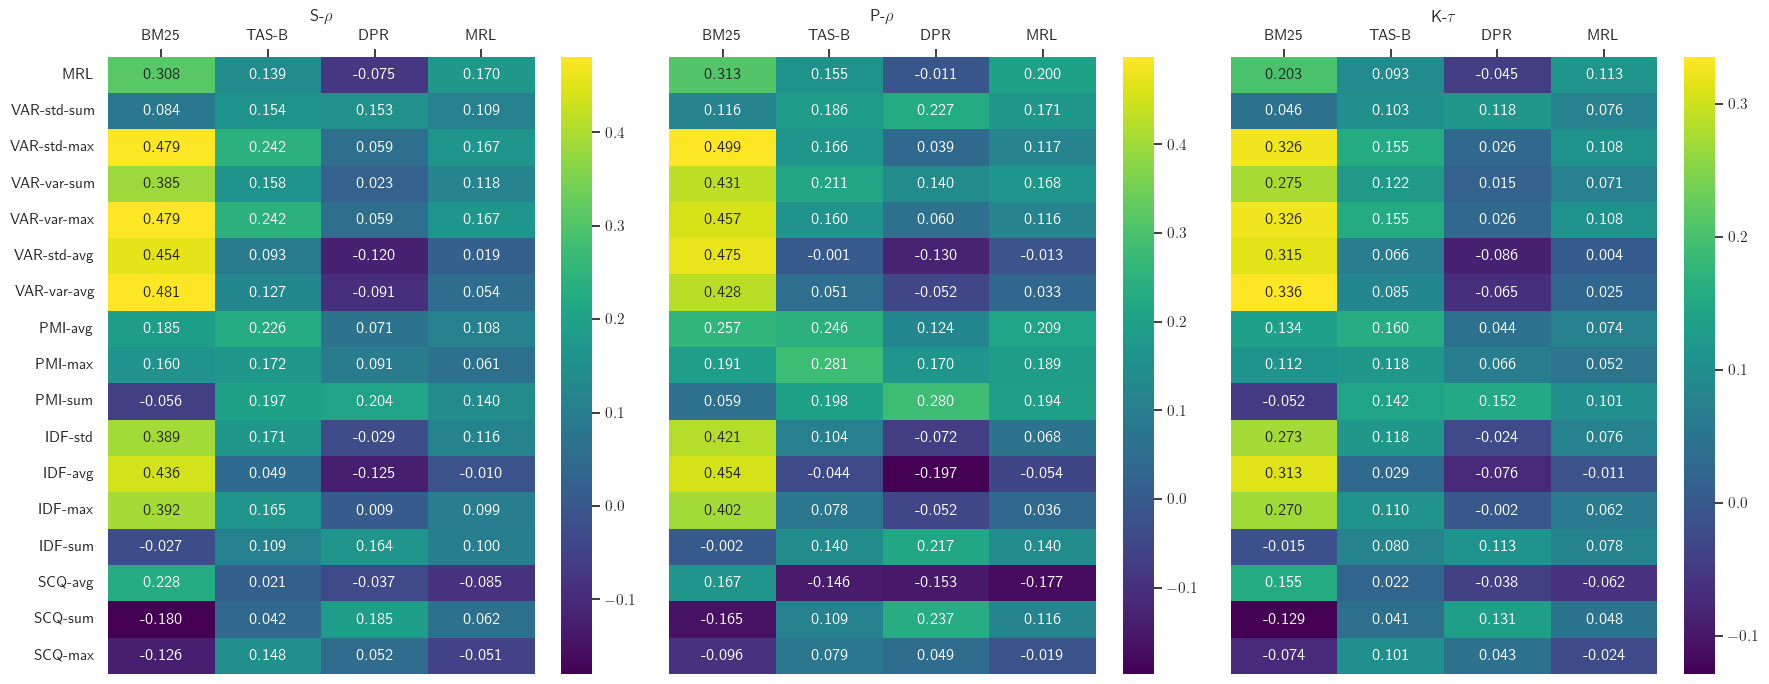

In [240]:
QPP_MODELS = {
    #"MCDropout-DB" : Path("./gathered_results/stoch_db_qpp_{method}"),
    # "MCDropout-DB-Frozen": Path("./gathered_results/stoch_db_frozen_qpp_{method}/"),
    # "MCDropout-TASB": Path("./gathered_results/stoch_tasb_qpp_{method}/"),
    # "MCDropout-TASB-Frozen": Path("./gathered_results/stoch_tasb_frozen_qpp_{method}/"),
    #"MVRL (ND)": Path("./gathered_results/mvrl_nd_tasb_2_qpp_{method}/"),
    # "MVRL (ND, LV)": Path("./gathered_results/mvrl_nd_tasb_logvar_qpp_{method}/"),
    #"MVRL (LV)": Path("./gathered_results/mvrl_tasb_MiniLM_pseudolabels_CL_3_logvar_lr_3106_updated_runs/"),
    "MVRL": Path("./gathered_results/mvrl_qpp_{method}/")
}

BASELINE_PATHS={
    "dl19": "../qpp_output/pre-retrieval/dl19/",
    "dl20": "../qpp_output/pre-retrieval/dl20/",
    "dev": "../qpp_output/pre-retrieval/dev/"
}

SELF_PERF_MODELS = {
    #"MCDropout-DB" : Path("./gathered_results/stoch_db_runs/"),
    # "MCDropout-DB-Frozen": Path("./gathered_results/stoch_db_frozen_runs/"),
    # "MCDropout-TASB": Path("./gathered_results/stoch_tasb_runs/"),
    # "MCDropout-TASB-Frozen": Path("./gathered_results/stoch_tasb_frozen_runs/"),
   # "MVRL (ND)": Path("./gathered_results/mvrl_nd_tasb_2_updated_runs/"),
    # "MVRL (ND, LV)": Path("./gathered_results/mvrl_nd_tasb_logvar_updated_runs/"),
    # "MVRL (LV)": Path("./gathered_results/mvrl_tasb_MiniLM_pseudolabels_CL_3_logvar_lr_3106_updated_runs/"),
    "MVRL": Path("./gathered_results/mvrl_updated_runs")
}

OTHER_PERF = {
    "BM25": {
        "dl19": Path("../datasets/actual_performances/dl19_bm25.json"),
        "dl20": Path("../datasets/actual_performances/dl20_bm25.json"),
        "dev": Path("../datasets/actual_performances/dev_bm25.json")
    }, 
    "TASB": {
        "dl19": Path("../datasets/actual_performances/dl19_tasb.json"),
        "dl20": Path("../datasets/actual_performances/dl20_tasb.json"),
        "dev": Path("../datasets/actual_performances/dev_tasb.json")
    }, 
    "DPR": {
        "dl19": Path("../datasets/actual_performances/dl19_dpr.json"),
        "dl20": Path("../datasets/actual_performances/dl20_dpr.json"),
        "dev": Path("../datasets/actual_performances/dev_dpr.json"),
    }, 
    "MVRL": {
        "dl19": Path("../datasets/actual_performances/dl19_mvrl.json"),
        "dl20": Path("../datasets/actual_performances/dl20_mvrl.json"),
        "dev": Path("../datasets/actual_performances/dev_mvrl.json"),
    }
        
}

QPP_METRIC = "ndcg@10"
RUN_METRIC = "ndcg_cut_10"

BL_PATH = {
    "dl19": Path("../qpp_output/pre-retrieval/dl19/"),
    "dl20": Path("../qpp_output/pre-retrieval/dl20/"),
    "dev": Path("../qpp_output/pre-retrieval/dev/")
}


# "det"
# QPP_AGG_METHODS = {"norm", "norm_recip", "sum"}
QPP_AGG_METHODS = {"norm"}
FLIP_NORM = True

QPP_BASELINES = [
    ("VAR", ('VAR-std-sum', 'VAR-std-max', 'VAR-var-sum', 'VAR-var-max', 'VAR-std-avg', 'VAR-var-avg')),
    ("PMI", ('PMI-avg', 'PMI-max', 'PMI-sum')),
    ("IDF", ('IDF-std', 'IDF-avg', 'IDF-max', 'IDF-sum')),
    ("SCQ", ('SCQ-avg','SCQ-sum', 'SCQ-max')),
    # ('QS',),
    # ("SCS", ('SCS-1','SCS-2')),
    # ('avgICTF',),
    # ('ql',)
]


if False:
    best_corr_metric =  "spearman"
    
    
    
    dev_all_rows = []
    dev_best_rows = {}
    
    
    # select the best performing methods on the dev set
    for ap_name, ap_paths in OTHER_PERF.items():
        dset = "dev"
        ap_path = ap_paths[dset]
        
        ## baseline results
        for qpp_bl_methods in QPP_BASELINES:
            qpp_method_name, qpp_bl_methods = qpp_bl_methods
            
            # pick best one
            qres = {}
            for m in qpp_bl_methods:
                ppath = BL_PATH[dset] / m
                qres[m] = compute_ref_perf(ap_path, ppath)
                qres[m]["dataset"] = dset
                qres[m]["ref"] = ap_name
                qres[m]["param"] = m
                qres[m]["method"] = qpp_method_name
                dev_all_rows.append(qres[m])
            
            best_ = max(qres.items(), key=lambda _: _[1][best_corr_metric])[1]
            dev_best_rows[(ap_name, qpp_method_name)] = best_
        
        ## model results wrt ref APs
        for qpp_method, path in QPP_MODELS.items():
            qres = {}
            for qpp_agg_method in QPP_AGG_METHODS:
                ppath = Path(str(path).format(method=qpp_agg_method)) / f"msmarco-{dset}.txt"
                m = qpp_method + f"({qpp_agg_method})"
                flip_sign = qpp_agg_method == "norm" and FLIP_NORM
                qres[qpp_agg_method] = compute_ref_perf(ap_path, ppath, flip_sign)
                qres[qpp_agg_method]["dataset"] = dset
                qres[qpp_agg_method]["ref"] = ap_name
                qres[qpp_agg_method]["param"] = qpp_agg_method
                qres[qpp_agg_method]["method"] = qpp_method
                
                dev_all_rows.append(qres[qpp_agg_method])
    
            best_ = max(qres.items(), key=lambda _: _[1][best_corr_metric])[1]
            dev_best_rows[(ap_name, qpp_method)] = best_
    
    
    qpp_rows = []

    for ap_name, ap_paths in OTHER_PERF.items():
        for dset, ap_path in ap_paths.items():
            
            ## add baseline results
            for qpp_bl_methods in QPP_BASELINES:
                qpp_method, qpp_bl_methods = qpp_bl_methods
                # pick best model
                qpp_param = dev_best_rows[(ap_name, qpp_method)]["param"]
                ppath = BL_PATH[dset] / qpp_param
                res = compute_ref_perf(ap_path, ppath)
                res["dataset"] = dset
                res["ref"] = ap_name
                res["method"] = qpp_method
                res["param"] = qpp_param
                qpp_rows.append(res)
                
            ## model results wrt ref APs
            for qpp_method, path in QPP_MODELS.items():
                qpp_agg_method = dev_best_rows[(ap_name, qpp_method)]["param"]
                ppath = Path(str(path).format(method=qpp_agg_method)) / f"msmarco-{dset}.txt"
                flip_sign = qpp_agg_method == "norm" and FLIP_NORM
                res = compute_ref_perf(ap_path, ppath, flip_sign)
                res["dataset"] = dset
                res["ref"] = ap_name
                res["method"] = qpp_method
                res["param"] = qpp_agg_method
                qpp_rows.append(res)
        
    ## model results wrt self
    for dset in ["dl19", "dl20"]:
        for qpp_method, path in QPP_MODELS.items():
            run_path = SELF_PERF_MODELS[qpp_method] / (dset + ".json")
            qpp_agg_method = dev_best_rows[(ap_name, qpp_method)]["param"]
            ppath = Path(str(path).format(method=qpp_agg_method)) / f"msmarco-{dset}.txt"
            m = qpp_method + f"({qpp_agg_method})"
            flip_sign = qpp_agg_method == "norm" and FLIP_NORM
            qres[m] = compute_self_perf(run_path, ppath, flip_sign)
            qres[m]["dataset"] = dset
            qres[m]["ref"] = "self"
            qres[m]["method"] = qpp_method
            qres[m]["param"] = qpp_agg_method
            qpp_rows.append(qres[m])
            
            # best_ = max(qres.items(), key=lambda _: _[1][best_corr_metric])[1]
            # best_rows.append(best_)
    
    
    #all_qpp = pd.DataFrame(all_rows)
    qpp_rows = pd.DataFrame(qpp_rows)
    
    best_qpp = reformat_qpp2(qpp_rows)

    QPP_ORDER = ["method", "BM25-dl19-spearman", "BM25-dl19-pearson", "BM25-dl19-ktau", 
                 "BM25-dl20-spearman", "BM25-dl20-pearson", "BM25-dl20-ktau", "param-BM25",
                "DPR-dl19-spearman", "DPR-dl19-pearson", "DPR-dl19-ktau", 
                 "DPR-dl20-spearman", "DPR-dl20-pearson", "DPR-dl20-ktau", "param-DPR",
                "TASB-dl19-spearman", "TASB-dl19-pearson", "TASB-dl19-ktau", 
                 "TASB-dl20-spearman", "TASB-dl20-pearson", "TASB-dl20-ktau", "param-TASB",
                "MVRL-dl19-spearman", "MVRL-dl19-pearson", "MVRL-dl19-ktau", 
                 "MVRL-dl20-spearman", "MVRL-dl20-pearson", "MVRL-dl20-ktau", "param-MVRL"]
    best_qpp = best_qpp[QPP_ORDER]
    best_qpp["method"] = pd.Categorical(best_qpp["method"], ["IDF", "VAR", "SCQ", "PMI", "MCDropout-DB", "MVRL"])
    best_qpp = best_qpp.sort_values(by=["method"])
    best_qpp.to_clipboard(index=False)
else:
    
    qpp_rows = []
    for dset in {"dl19", "dl20"}:

        qpp_agg_method = "norm"
        for qpp_method, path in QPP_MODELS.items():
            run_path = SELF_PERF_MODELS[qpp_method] / (dset + ".json")
            ppath = Path(str(path).format(method=qpp_agg_method)) / f"msmarco-{dset}.txt"
            m = qpp_method + f"({qpp_agg_method})"
            flip_sign = qpp_agg_method == "norm" and FLIP_NORM
            res = compute_self_perf(run_path, ppath, flip_sign)
            res["dataset"] = dset
            res["ref"] = "self"
            res["method"] = qpp_method
            res["param"] = qpp_agg_method
            res["method_key"] = m
            qpp_rows.append(res)


        for ap_name, ap_paths in OTHER_PERF.items():
        
            ap_path = ap_paths[dset]
            
            ## baseline results
            for qpp_bl_methods in QPP_BASELINES:
                qpp_method_name, qpp_bl_methods = qpp_bl_methods
                
                for m in qpp_bl_methods:
                    ppath = BL_PATH[dset] / m
                    res = compute_ref_perf(ap_path, ppath)
                    res["dataset"] = dset
                    res["ref"] = ap_name
                    res["param"] = m
                    res["method"] = qpp_method_name
                    res["method_key"] = qpp_method_name + f"({m})"
                    qpp_rows.append(res)
        
            
            ## model results wrt ref APs
            for qpp_method, path in QPP_MODELS.items():
                for qpp_agg_method in QPP_AGG_METHODS:
                    ppath = Path(str(path).format(method=qpp_agg_method)) / f"msmarco-{dset}.txt"
                    m = qpp_method + f"({qpp_agg_method})"
                    flip_sign = qpp_agg_method == "norm" and FLIP_NORM
                    res =  compute_ref_perf(ap_path, ppath, flip_sign)
                    res["dataset"] = dset
                    res["ref"] = ap_name
                    res["param"] = qpp_agg_method
                    res["method"] = qpp_method       
                    res["method_key"] = m
                    qpp_rows.append(res)

    qpp = pd.DataFrame(qpp_rows)
    
    refs = qpp["ref"].unique().tolist()
    refs.remove("self")

    ref_name = {
        "BM25": "BM25",
        "TASB": "TAS-B",
        "MVRL": "MRL",
        "DPR": "DPR"
    }
                 
    method_keys = qpp["method_key"].unique()
    method_name = {
        'MVRL(norm)': 'MRL',
         'VAR(VAR-std-sum)': 'VAR-std-sum',
         'VAR(VAR-std-max)': 'VAR-std-max',
         'VAR(VAR-var-sum)': 'VAR-var-sum',
         'VAR(VAR-var-max)': 'VAR-var-max',
         'VAR(VAR-std-avg)': 'VAR-std-avg',
         'VAR(VAR-var-avg)': 'VAR-var-avg',
         'PMI(PMI-avg)': 'PMI-avg',
         'PMI(PMI-max)': 'PMI-max',
         'PMI(PMI-sum)': 'PMI-sum',
         'IDF(IDF-std)': 'IDF-std',
         'IDF(IDF-avg)': 'IDF-avg',
         'IDF(IDF-max)': 'IDF-max',
         'IDF(IDF-sum)': 'IDF-sum',
         'SCQ(SCQ-avg)': 'SCQ-avg',
         'SCQ(SCQ-sum)': 'SCQ-sum',
         'SCQ(SCQ-max)': 'SCQ-max'
    }
    method_names = [method_name[_] for _ in method_keys]
    
    corr_name = {"spearman": "S-$\\rho$", "pearson": "P-$\\rho$", "ktau": "K-$\\tau$"}
    
    for dset in {"dl19", "dl20"}:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 7), sharey=True)
        for ax, metric in zip(axes, ["spearman", "pearson", "ktau"]):
            # x axis = ref 
            # y axis = method
            corr_mat = []
            for method in method_keys:
                row = {}
                for ref in refs:    
                    row[ref_name[ref]] = qpp.query("method_key==@method and ref==@ref and dataset==@dset").iloc[0].to_dict()[metric]
                corr_mat.append(row)
            corr_mat = pd.DataFrame(corr_mat)

            corr_mat.index = pd.Series(method_names)
            sns.heatmap(corr_mat, annot=True, ax=ax, fmt=".3f", cmap="viridis")
            ax.set_title(corr_name[metric])
            ax.xaxis.tick_top()
        plt.tight_layout()
        plt.savefig(f"figures/qpp_{dset}.pdf")


In [165]:
def reformat_qpp(df, drop_dev=True, drop_pval=True):
    rows = {}
    for _, row in df.iterrows():
        dset = row["dataset"]
        if drop_dev and dset == "dev":
            continue
        k = (row["method"], row["ref"])
        if k not in rows:
            rows[k] = {"method": row["method"], "ref": row["ref"], "param": row["param"]}
        for col in ["spearman", "spearman_pval", "pearson", "pearson_pval", "ktau", "ktau_pval"]:
            if drop_pval and "_pval" in col:
                continue
            rows[k][f"{dset}-{col}"] = row[col]
    return pd.DataFrame(rows.values())

def reformat_qpp2(df, drop_dev=True, drop_pval=True):
    rows = {}
    for _, row in df.iterrows():
        dset = row["dataset"]
        if drop_dev and dset == "dev":
            continue
        k = row["method"]
        if k not in rows:
            rows[k] = {"method": row["method"]}
        ref = row["ref"]
        rows[k][f"param-{ref}"] = row["param"]
        
        for col in ["spearman", "spearman_pval", "pearson", "pearson_pval", "ktau", "ktau_pval"]:
            if drop_pval and "_pval" in col:
                continue
            rows[k][f"{ref}-{dset}-{col}"] = row[col]
    return pd.DataFrame(rows.values())



,method,param-BM25,BM25-dl19-spearman,BM25-dl19-pearson,BM25-dl19-ktau,BM25-dl20-spearman,BM25-dl20-pearson,BM25-dl20-ktau,param-TASB,TASB-dl19-spearman,...,MVRL-dl20-spearman,MVRL-dl20-pearson,MVRL-dl20-ktau,param-self,self-dl19-spearman,self-dl19-pearson,self-dl19-ktau,self-dl20-spearman,self-dl20-pearson,self-dl20-ktau
0,VAR,VAR-std-avg,0.333736,0.387973,0.224806,0.453601,0.474842,0.314575,VAR-std-avg,0.080048,...,0.019327,-0.013349,0.004197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PMI,PMI-avg,0.449109,0.489360,0.313400,0.185481,0.257158,0.134219,PMI-avg,0.259024,...,0.108070,0.208677,0.074152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDF,IDF-avg,0.307460,0.374181,0.215947,0.435648,0.453765,0.313177,IDF-avg,0.101646,...,-0.009797,-0.053675,-0.011193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SCQ,SCQ-avg,-0.107822,-0.118831,-0.065338,0.227944,0.166761,0.155191,SCQ-avg,-0.116448,...,-0.084664,-0.176642,-0.061560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MVRL,norm,0.023709,0.030366,0.032115,0.308258,0.312802,0.202726,norm,0.124453,...,0.170358,0.199549,0.113326,norm,0.105263,0.170482,0.067628,0.170358,0.199549,0.113326


In [34]:
# QPP_ORDER = ["ref", "method", "dl19-spearman", "dl19-pearson", "dl19-ktau", "dl20-spearman", "dl20-pearson", "dl20-ktau", "param"]
# best_qpp = best_qpp[QPP_ORDER]
# best_qpp["method"] = pd.Categorical(best_qpp["method"], ["IDF", "VAR", "SCQ", "PMI", "MCDropout-DB", "MVRL"])
# best_qpp = best_qpp.sort_values(by=["ref", "method"])
# best_qpp_sel = best_qpp[best_qpp["ref"].apply(lambda _: _ in {"self", "DPR"})]
# best_qpp_sel.to_clipboard(index=False)

In [35]:
# best_qpp_oth = best_qpp[best_qpp["ref"].apply(lambda _: _ not in {"self", "DPR"})]
# best_qpp_oth.to_clipboard(index=False)

In [109]:
# all_qpp = all_qpp[QPP_ORDER]
# all_qpp = all_qpp.sort_values(by=["dataset", "ref", "method"])
# all_qpp.to_clipboard(index=False)

In [70]:
# best_qpp = reformat_qpp(qpp_rows)
# QPP_ORDER = ["ref", "method", "dl19-spearman", "dl19-pearson", "dl19-ktau", "dl20-spearman", "dl20-pearson", "dl20-ktau", "param"]
# best_qpp = best_qpp[QPP_ORDER]
# best_qpp["method"] = pd.Categorical(best_qpp["method"], ["IDF", "VAR", "SCQ", "PMI", "MCDropout-DB", "MVRL"])
# best_qpp = best_qpp.sort_values(by=["ref", "method"])
# best_qpp_sel = best_qpp[best_qpp["ref"].apply(lambda _: _ in {"self"})]
# best_qpp_sel.to_clipboard(index=False)

In [58]:
df = pd.read_csv("./qpp_checkpoints.csv")

In [59]:
df

,dataset,ref,checkpoint,spearman,pearson,ktau
0,dl19,bm25,25000,0.0610,0.1261,0.0365
1,dl19,dpr,25000,-0.0897,-0.0933,-0.0643
2,dl19,tasb,25000,-0.1844,-0.1421,-0.1220
3,dl19,bm25,50000,-0.0387,-0.0067,-0.0144
4,dl19,dpr,50000,-0.0369,-0.0313,-0.0288
5,dl19,tasb,50000,-0.1021,-0.0996,-0.0643
6,dl19,bm25,100000,0.1433,0.1237,0.0986
7,dl19,dpr,100000,-0.0523,-0.0739,-0.0310
8,dl19,tasb,100000,-0.0008,0.0449,0.0044
9,dl19,bm25,125000,0.1833,0.1776,0.1274


## Clean vs Corrupted

In [142]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
sns.set_style("white", rc={'text.usetex': True})
#sns.set_context("paper")


In [148]:
with open("./dl_clean.txt") as reader:
    dl_clean = {}
    for line in reader:
        qid, qpp = line.split()
        dl_clean[qid] = float(qpp)
with open("./dl_typo.txt") as reader:
    dl_typo = {}
    for line in reader:
        qid, qpp = line.split()
        dl_typo[qid] = float(qpp)
    
qids = sorted(list(dl_clean.keys()))
dl_clean = [dl_clean[_] for _ in qids]
dl_typo = [dl_typo[_] for _ in qids]
diff = [dl_clean[_] - dl_typo[_] for _ in range(len(qids))]

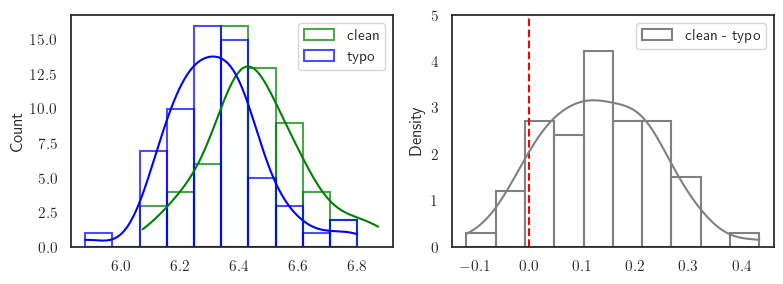

In [153]:


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
bins = 10

_, edges = np.histogram(dl_typo, bins)

sns.histplot(x=dl_clean, ax=ax[0], label="clean", kde=True, fill=False, color="green", bins=edges, alpha=0.7)
sns.histplot(x=dl_typo, ax=ax[0], label="typo", kde=True, fill=False, color="blue", bins=edges, alpha=0.7)

ax[0].legend()


# ax[1].hist(diff, alpha=0.7)
ax[1].vlines(0, 0, 5, linestyles="dashed", color="red")
ax[1].set_ylim(0, 5)

sns.histplot(x=diff, ax=ax[1], stat="density", kde=True, fill=False, color="gray", bins=bins, label="clean - typo")
ax[1].legend()
plt.tight_layout()
#plt.show()
plt.savefig("./figures/typo_clean.pdf", format="pdf")

## QPP stuff


/Users/sam/miniconda3/envs/multivariate_ir/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/sam/miniconda3/envs/multivariate_ir/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/sam/miniconda3/envs/multivariate_ir/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


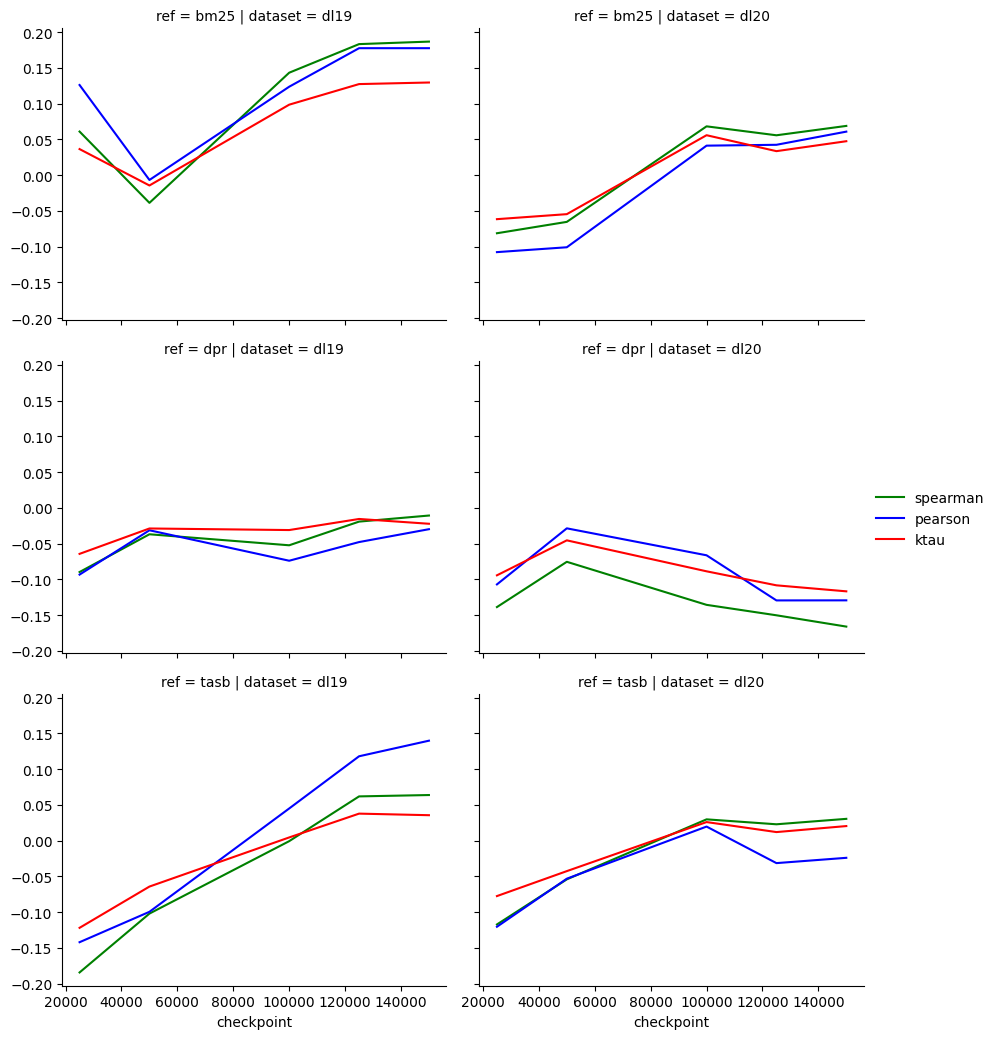

In [62]:
g = sns.FacetGrid(df, col="dataset", row="ref", height=3.5, aspect=1.3, sharey=True)
g.map(sns.lineplot, "checkpoint", "spearman", data=df, color="green", label="spearman")
g.map(sns.lineplot, "checkpoint", "pearson", data=df, color="blue", label="pearson")
g.map(sns.lineplot, "checkpoint", "ktau", data=df, color="red", label="ktau")
g.set_ylabels("")
g.add_legend()
g.savefig("figures/qpp_checkpoint.png")

In [70]:
sel={"MVRL (ND, LV)": 14, "MVRL-ND-TASB-Logvar-2GPU": 28, "MVRL-(ND, LV BZ-128)": 128, "MVRL-(ND, LV BZ-256)": 256, "MVRL-(ND, LV BZ-512)": 512}
bz_df = all_res_df[all_res_df.model.apply(lambda _: _ in sel)].copy()
bz_df["bz"] = bz_df.model.apply(lambda _: sel[_])
bz_df_ = []
for row in bz_df.to_dict("records"):
    for col in bz_df.columns:
        if col in {"model", "bz"}:
            continue
        bz_df_.append({
            "model": row["model"],
            "bz": row["bz"],
            "dataset": col.split("_")[0],
            "metric": "_".join(col.split("_")[1:]),
            "value": row[col]
        })
bz_df = pd.DataFrame(bz_df_)


/Users/sam/miniconda3/envs/multivariate_ir/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


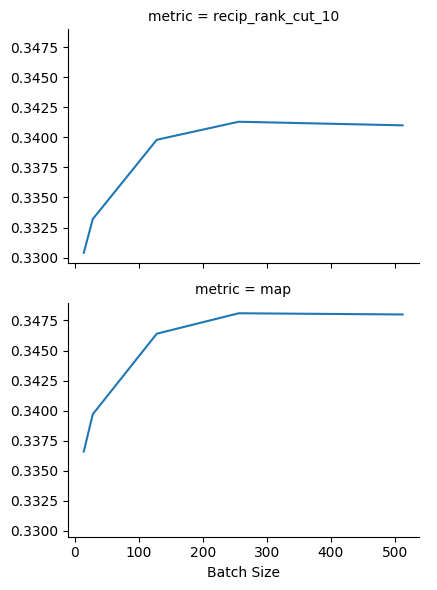

In [67]:
# plt.figure()
msm_bz_df = bz_df.query("dataset == 'dev'")
g = sns.FacetGrid(msm_bz_df, row="metric", aspect=1.5)
g.map(sns.lineplot, "bz", "value", data=bz_df)
g.set_ylabels("")
g.set_xlabels("Batch Size")
#plt.suptitle("MSMARCO Dev", y=0, x=0.57)
g.add_legend()
g.savefig("figures/msm_bz.svg")
# sns.lineplot(x="bz", y="dev_map", data=bz_df)
# sns.lineplot(x="bz", y="dev_recip_rank_cut_10", data=bz_df)
# plt.show()

/Users/sam/miniconda3/envs/multivariate_ir/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


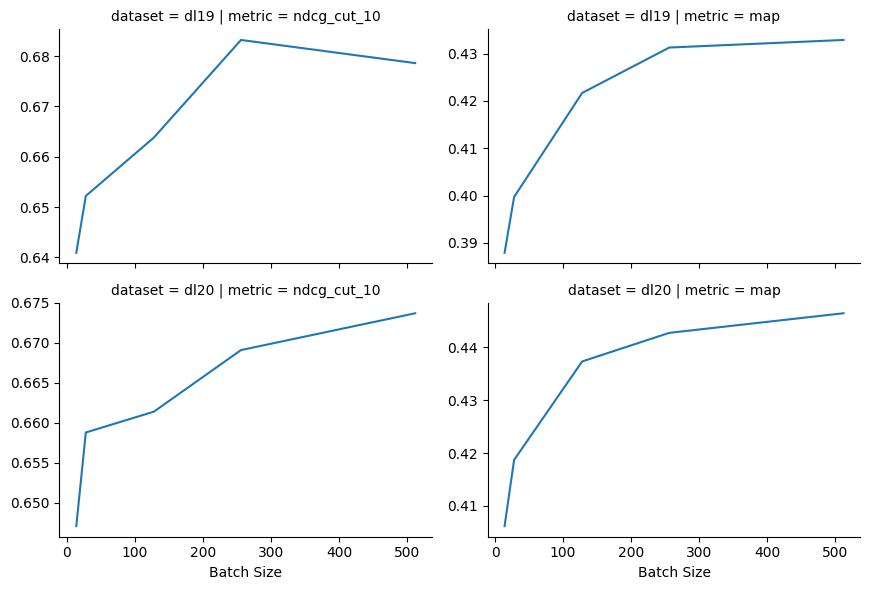

In [68]:
dl_bz_df = bz_df.query("dataset == 'dl19' or dataset == 'dl20'")
g = sns.FacetGrid(dl_bz_df, col="metric", row="dataset", aspect=1.5, sharey=False)
g.map(sns.lineplot, "bz", "value", data=dl_bz_df)
g.set_ylabels("")
g.set_xlabels("Batch Size")
#plt.suptitle("DL19/20", y=0, x=0.55)
g.savefig("figures/dl1920_bz.svg")

/Users/sam/miniconda3/envs/multivariate_ir/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


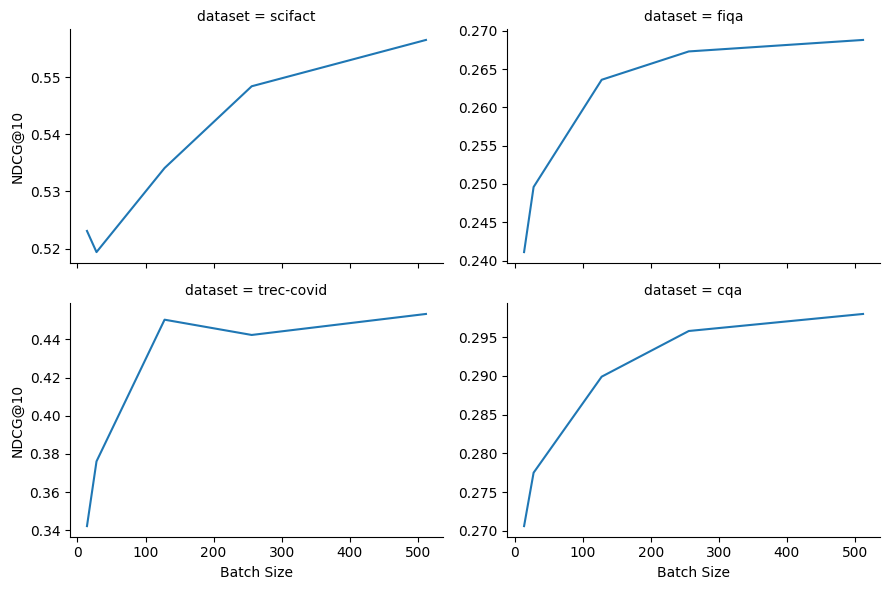

In [69]:
zs_bz_df = bz_df.query("dataset != 'dl19' and dataset != 'dl20' and dataset != 'dev'")
g = sns.FacetGrid(zs_bz_df, col="dataset", col_wrap=2, aspect=1.5, sharey=False)
g.map(sns.lineplot, "bz", "value", data=zs_bz_df)
g.set_ylabels("NDCG@10")
g.set_xlabels("Batch Size")
g.savefig("figures/zs_bz.svg")

### Dataset statistics


In [5]:
import datasets
from transformers import AutoConfig, AutoTokenizer

In [36]:
def get_statistics(name, corpus, query, tokenizer_name="distilbert-base-uncased"):

    def count_tokens(dataset, field):
        counts = dataset.map(lambda _: {"n_toks": len(tokenizer(_[field])["input_ids"])})
        return np.sum(counts["n_toks"])
        
    
    if "beir" in corpus:
        corpus = datasets.load_dataset("Tevatron/beir-corpus", corpus.split(":")[-1], split="train")
        query = datasets.load_dataset("Tevatron/beir", query.split(":")[-1], split="test")
    else:
        corpus = datasets.load_dataset(corpus, split="train")
        try:
            query = datasets.load_dataset(query)
        except:
            _ = query.split("/")
            query = datasets.load_dataset("/".join(_[:2]), split=_[-1])
        
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
    
    return {
        "name": name,
        "nQ": len(query),
        "nD": len(corpus),
        "nQToks": count_tokens(query, "query"),
        "nDToks": count_tokens(corpus, "text")
    }


DATASETS = {
    "MSMARCO": ("Tevatron/msmarco-passage-corpus", "Tevatron/msmarco-passage/dev"),
    "TREC-DL19": ("Tevatron/msmarco-passage-corpus", "Tevatron/msmarco-passage/dl19"),
    "TREC-DL20": ("Tevatron/msmarco-passage-corpus", "Tevatron/msmarco-passage/dl20"),
    "Scifact": ("Tevatron/scifact-corpus", "Tevatron/scifact/dev"),
}
CQA = ["cqadupstack-android", "cqadupstack-english", "cqadupstack-gaming", "cqadupstack-gis",
       "cqadupstack-wordpress", "cqadupstack-physics", "cqadupstack-programmers",
       "cqadupstack-stats", "cqadupstack-tex", "cqadupstack-unix",
       "cqadupstack-webmasters", "cqadupstack-wordpress", "cqadupstack-mathematica"]

for d in ["fiqa", "trec-covid"] + CQA:
    DATASETS[d] = (f"Tevatron/beir-corpus:{d}", f"Tevatron/beir:{d}")


d_stats = []

for d, (corpus, query) in DATASETS.items():
    d_stats.append(get_statistics(d, corpus, query))

d_stats = pd.DataFrame(d_stats)
row = d_stats[d_stats["name"].apply(lambda _: _.startswith("cqa"))].sum()
row = row.to_dict()
row["name"] = "cqadupstack"
d_stats = pd.concat([d_stats[d_stats["name"].apply(lambda _: not _.startswith("cqa"))], pd.DataFrame([row])])

Reusing dataset msmarco-passage-corpus (/Users/sam/.cache/huggingface/datasets/Tevatron___msmarco-passage-corpus/default/0.0.1/3d8add51914a7d2b589d09e37f4cd9646ebe4a3bad6d59b4e3702cfcc9941f23)
Reusing dataset msmarco-passage (/Users/sam/.cache/huggingface/datasets/Tevatron___msmarco-passage/default/0.0.1/300947ae554083632b487251f17ce2100425fd1135048532fb20afa1d66e9e62)
Loading cached processed dataset at /Users/sam/.cache/huggingface/datasets/Tevatron___msmarco-passage/default/0.0.1/300947ae554083632b487251f17ce2100425fd1135048532fb20afa1d66e9e62/cache-42e7728fe43ace96.arrow
Loading cached processed dataset at /Users/sam/.cache/huggingface/datasets/Tevatron___msmarco-passage-corpus/default/0.0.1/3d8add51914a7d2b589d09e37f4cd9646ebe4a3bad6d59b4e3702cfcc9941f23/cache-9e328a5f004a0087.arrow
Reusing dataset msmarco-passage-corpus (/Users/sam/.cache/huggingface/datasets/Tevatron___msmarco-passage-corpus/default/0.0.1/3d8add51914a7d2b589d09e37f4cd9646ebe4a3bad6d59b4e3702cfcc9941f23)
Reusing 

In [39]:
d_stats["avgQLen"] = d_stats["nQToks"] / d_stats["nQ"]
d_stats["avgDLen"] = d_stats["nDToks"] / d_stats["nD"]
d_stats

,name,nQ,nD,nQToks,nDToks,avgQLen,avgDLen
0,MSMARCO,6980,8841823,62958,680584022,9.019771,76.973269
1,TREC-DL19,43,8841823,388,680584022,9.023256,76.973269
2,TREC-DL20,54,8841823,498,680584022,9.222222,76.973269
3,Scifact,300,5183,6853,1636015,22.843333,315.650203
4,fiqa,648,57638,10103,10208682,15.591049,177.117214
5,trec-covid,50,171332,902,38511584,18.040000,224.777531
0,cqadupstack,13145,457199,178157,113720074,13.553214,248.732114


/var/folders/dv/nvf6gnxn4tn8cxsbt18y6x3m0000gn/T/ipykernel_92343/662419167.py:15: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(x, y, z, color="Blues")


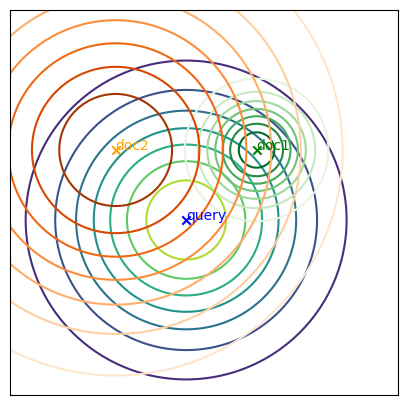

In [242]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x, y = np.mgrid[-10:10:.1, -10:10:.1]
query = multivariate_normal([0, 0], [[5, 0], [0, 5.0]])
docrel = multivariate_normal([2, 2], [[1, 0], [0, 1.0]])
doc_irrel = multivariate_normal([-2, 2], [[10, 0], [0, 10.0]])


plt.figure(figsize=(5, 5))

data = np.dstack((x, y))
z = query.pdf(data)
plt.contour(x, y, z, color="Blues")
plt.text(0,0, "query", color="blue")
plt.scatter([0], [0], marker="x", color="blue")

z = docrel.pdf(data)
plt.contour(x, y, z, cmap="Greens")
plt.text(2,2, "doc1", color="green")
plt.scatter([2], [2], marker="x", color="green")


z = doc_irrel.pdf(data)
plt.contour(x, y, z, cmap="Oranges")
plt.text(-2,2, "doc2", color="orange")
plt.scatter([-2], [2], marker="x", color="orange")

plt.yticks([])
plt.xticks([])

plt.ylim((-5, 6))
plt.xlim((-5, 6))

#plt.show()
plt.savefig("ex_mult_qd.png", dpi=600)